<a href="https://colab.research.google.com/github/pazz09/ADA-Informes/blob/main/PROBLEMA_MOCHILA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- **DESCRIPCIÓN DEL PROBLEMA**  :

Problema de la mochila: Conseguir el valor máximo que se puede tener en una mochila al ingresar objetos.

Entrada: Capacidad máxima de la mochila y dos secuencias de datos, el peso de cada objeto y su valor.

Salida: El costo máximo optimizando la cantidad de objetos colocados dentro de la mochila.

**Datos:**

La mochila solo puede ir guardando objetos si la suma de los pesos de los objetos no supera el peso máximo que soporta la mochila.

Se debe considerar siempre el peso y asi poder guardar cualquier cantidad de objetos sin necesidad de tener en cuenta sus tamaños. 

Es posible que la mochila no soporte ningún artículo.





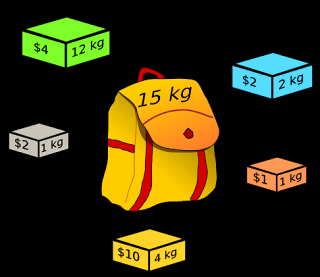




----------------------------------------------------------


2- **ALGORITMOS A UTILIZAR**:

**Programación dinámica y Greedy**

El objetivo de los algoritmos será maximizar las ganancias al vender la mochila teniendo el peso y el precio de los objetos guardados, pero poner la mayor cantidad de articulos posibles en la mochila no asegura máximizar su valor, por ello, se debe probar cada combinación de objetos posibles.

**Subestructura óptima**

- *Caso base*: peso máximo = 0 , iteración = 0.

- 1er Caso: El objeto no supera la capacidad máxima. Para este caso debemos elegir el mayor precio entre la mochila que puede contener el objeto que se quiere guardar y una mochila cuyo peso es el de la mochila menos el peso del objeto que se quiere guardar.

- 2do Caso: El objeto supera la capacidad máxima. Esto puede ocurrir si este objeto por si solo la supera o agregandolo a la mochila este supera la capacidad máxima.




 

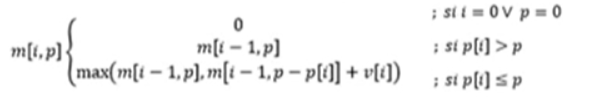

**Método greedy**

El algortimo resuelve el problema de la mochila de una forma más rapida, pero no muy eficaz. Este método falla cuando hay casos donde hay muchos objetos dentro de la mochila, ya que piensa que cuanto más objetos hay guardados, mayor es el valor y esto no pasa siempre.

---------------------------
**EJEMPLO**

*Entrada:* 

Peso máximo mochila: 70

Peso objetos: [19, 20, 31, 57]

Valor objetos: [2, 30, 10, 90]

*Procedimiento:*

Si sumamos los pesos de los primeros objetos: 19 + 20 + 31 = 70 , nos da el peso máximo de la mochila, aunque si sumamos sus valores: 2 + 30 + 10 = 42, es menor al valor del último objeto.

Por ello, elegimos el último objeto (peso = 57 y valor = 90) para tener el máximo de ganancias.

*Salida:*

El máximo de ganancia que podemos obtener: $90

--------------------------------------
3- **IMPLEMENTACIÓN DEL ALGORITMO**

Bottom-up

In [102]:
import numpy as np

def bottom_up(p_max, p, v, verbose = False):
    
    n = len(v) 

    a = np.zeros((n+1, p_max+1), dtype=int)
    
    for i in range(n + 1):
         for j in range(p_max + 1):
            if i == 0  or  j == 0:
               a[i][j] = 0

            else:
              if p[i-1] <= j:
                prev = a[i-1][j]
                current =  v[i-1] + a[i-1][j-p[i-1]]
                a[i][j] = maximo(current, prev)

                if verbose:
                      print(f"La mochila puede guardar {j}kg, guarda {i-1} y su valor máximo es ${a[i-1][j]}")
                      print(f"El objeto {i}, pesa {p[i-1]}kg y vale ${v[i-1]} se puede agregar")
                      print(f"${v[i-1] + a[i-1][j-p[i-1]]} = ${v[i-1]} + ${a[i-1][j-p[i-1]]}")
                      print(f"El valor máximo para la mochila es de ${a[i][j]}")
                      print("")
              else:
                  a[i][j] = a[i-1][j]
                  if verbose:
                      print(f"La mochila puede guardar {j}kg, guarda {i-1} y su valor máximo es ${a[i-1][j]}")
                      print(f"El objeto de valor ${v[i-1]} y peso {p[i-1]}kg no se puede agregar")
                      print("El valor máximo se mantendra igual a lo que valia antes")
                      print("")

    global cont
    cont = (n)
    cont *= (p_max+1)
    return a[n][p_max]

In [103]:
def maximo(a,b):
  if a > b: return a
  return b

In [104]:
cont = 0
p_max = 10
p_objetos = [5,1,4,8]
v_objetos = [2,1,7,10]

print("Peso máximo de la mochila:", p_max)
print("Peso objetos:" ,p_objetos)
print("Valor objetos:",v_objetos)
print("")

valor_max = bottom_up(p_max, p_objetos, v_objetos, verbose = True)
print("El máximo valor que podemos llevarnos en la mochila es de: $", valor_max)
print(f"Resuelve {cont} subproblemas.")

Peso máximo de la mochila: 10
Peso objetos: [5, 1, 4, 8]
Valor objetos: [2, 1, 7, 10]

La mochila puede guardar 1kg, guarda 0 y su valor máximo es $0
El objeto de valor $2 y peso 5kg no se puede agregar
El valor máximo se mantendra igual a lo que valia antes

La mochila puede guardar 2kg, guarda 0 y su valor máximo es $0
El objeto de valor $2 y peso 5kg no se puede agregar
El valor máximo se mantendra igual a lo que valia antes

La mochila puede guardar 3kg, guarda 0 y su valor máximo es $0
El objeto de valor $2 y peso 5kg no se puede agregar
El valor máximo se mantendra igual a lo que valia antes

La mochila puede guardar 4kg, guarda 0 y su valor máximo es $0
El objeto de valor $2 y peso 5kg no se puede agregar
El valor máximo se mantendra igual a lo que valia antes

La mochila puede guardar 5kg, guarda 0 y su valor máximo es $0
El objeto 1, pesa 5kg y vale $2 se puede agregar
$2 = $2 + $0
El valor máximo para la mochila es de $2

La mochila puede guardar 6kg, guarda 0 y su valor máxi

Greedy

In [105]:
def greedy(p_max, p, v, verbose= False):

    n = len(v)
    v_max = v[0]
    a = p[0]
    
    if verbose:
        print(f"Objeto de peso {a}kg se agrega")
        print("Peso mochila $", a)
        print("Valor máximo de $", v_max)
        print("")
    
    global aux

    for i in range(1, n):
        aux += 1
        if verbose:
            print(f"Objeto de peso {p[i]}kg se agrega")
            print(f"Peso mochila {a + p[i]}kg")
            print("")
        if a + p[i] > p_max: 
            if verbose:
                print(f"Objeto de peso {p[i]}kg no se puede agregar")
                print(f"Peso con el objeto: {a + p[i]}kg, es mayor al peso permitido. Los siguientes objetos tampoco se agregan")
                print("")
            break
        v_max += v[i]
        a += p[i]
        if verbose:
            print(f"El objeto se agrega, sin sobrepasar el peso permitido")
            print(f"Peso mochila {a}kg y su valor máximo es ${v_max}")
            print("")
    return v_max

In [106]:
aux = 0
p_max = 10
p_objetos = [5,1,4,8]
v_objetos = [2,1,7,10]

print("Peso máximo de la mochila:", p_max)
print("Peso objetos:" ,p_objetos)
print("Valor objetos:",v_objetos)
print("")

valor_max = greedy(p_max, p_objetos, v_objetos, verbose = True)
print("El máximo valor que podemos llevarnos en la mochila es de: $", valor_max)
print("Iteraciones:", aux)

Peso máximo de la mochila: 10
Peso objetos: [5, 1, 4, 8]
Valor objetos: [2, 1, 7, 10]

Objeto de peso 5kg se agrega
Peso mochila $ 5
Valor máximo de $ 2

Objeto de peso 1kg se agrega
Peso mochila 6kg

El objeto se agrega, sin sobrepasar el peso permitido
Peso mochila 6kg y su valor máximo es $3

Objeto de peso 4kg se agrega
Peso mochila 10kg

El objeto se agrega, sin sobrepasar el peso permitido
Peso mochila 10kg y su valor máximo es $10

Objeto de peso 8kg se agrega
Peso mochila 18kg

Objeto de peso 8kg no se puede agregar
Peso con el objeto: 18kg, es mayor al peso permitido. Los siguientes objetos tampoco se agregan

El máximo valor que podemos llevarnos en la mochila es de: $ 10
Iteraciones: 3


--------------------------------------------


**4- PROPIEDADES DEL ALGORITMO**

CORRECTITUD BOTTOM-UP

*Teorema:* 
El algortimo retorna el máximo valor posible de una mochila **A**, guardando **n** objetos.

*Prueba del teorema:* 
- Inicialización: Al comienzo de la 1era iteración. El objeto con peso = 0 y valor = 0 no existe. Agregar un objeto que vale 0 a una mochila que no tiene valor, no cambiara su valor. Independiente del peso máximo de la mochila.

- Mantención: Dentro del for más pequeño, se ira obteniendo el valor máximo, dependiendo si el peso individual del objeto no supera el peso máximo de la mochila. Si el peso sobrepasa el soportado, dejamos como valor óptimo el valor al agregar el anterior objeto. Entonces si el objeto no sobrepasa el peso superior, se compara el valor máximo de la mochila con el mismo peso cuando se agregó el anterior objeto y el precio del objeto más el valor óptimo de la mochila que al agregar el peso del objeto contenga un peso que soporta la mochila.

Como conclusión, se puede decir que al terminar la n_ésima iteración del for más grande, se obtendrá el máximo valor de una mochila al agregar n objetos.

**¿Por qué el algortimo Greedy no es correcto?**

El algortimo Greedy resuelve el problema de una forma no tan eficaz, encuentra la solución, pero no la óptima. Esto ocurre ya que el algoritmo cree que mintras más objetos entren a la mochila, mayor sera el valor máximo.

Solo considera los objetos que consigan mejor posibilidad de entrar a la mochila, estó hace que no compruebe todos los casos posibles y no logre encontrar el mejor resultado.

TIEMPO DE EJECUCIÓN 

**Bottom-up**

*Teorema:* 

Tiempo de ejecución: O(n*P)

P = peso máximo de la mochila

n = cantidad de objetos

*Prueba del teorema:*

El algortimo necesita una matriz de n * P. Tenemos dos for anidados para resolver los sub-problemas. Dentro del for más pequeño, se resuelve el problema a todos los casos posibles sacando el valor óptimo al agregar un objeto. 

Función del tiempo de ejecución: T(n) = 2 * O(n*P)

-------------------------

**Greedy**

*Teorema:*

Tiempo de ejecución: O(n*log(n))

*Prueba del teorema:*

El tiempo de ejecución es la suma del tiempo de ejecución del algortimo de ordenamiento y el greedy que busca la cantidad máxima de objetos que pueden entrar a una mochila.

Función: T(n) = O(n*log(n)) + O(n)





----------------
5- EXPERIMENTOS Y ANÁLISIS



Comparación tiempo de ejecución de los dos algortimos

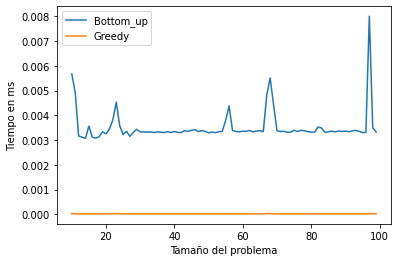

In [122]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; z=[]

for n in range(10,100):
    p_max = 70
    p_objetos =  [19, 20, 31, 57]
    v_objetos = [2, 30, 10, 90]
    aux = 0
    cont = 0

    a = repeat(setup="from __main__ import bottom_up", stmt=f"bottom_up({p_max}, {p_objetos}, {v_objetos})", repeat=1, number=10)
    b = repeat(setup="from __main__ import greedy", stmt=f"greedy({p_max}, {p_objetos}, {v_objetos})", repeat=1, number=10)

    x.append(n)
    y.append(a)
    z.append(b)


plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Bottom_up", "Greedy"])

plt.xlabel('Tamaño del problema')
plt.ylabel('Tiempo en ms')
plt.show()

ANÁLISIS DEL GRÁFICO

Se puede observar que el tiempo de ejecución del bottom_up es mucho mayor que el del greedy. Esto pasa ya que bottom_up comprueba todos los casos para que se guarden muchos o pocos objetos y asi encontrar el valor máximo. En cambio greedy asume que el objeto con menor peso nos podrá dar el mayor precio, además de asumir que cuanto mas objetos guarde en la mochila, más valor máximo se tendrá. 

Cantidad de sub_problemas e iteraciónes

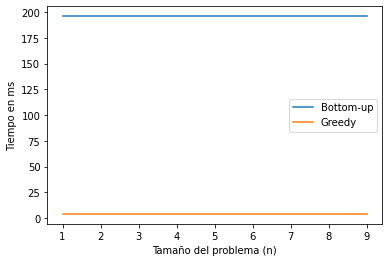

In [101]:
import matplotlib.pyplot as plt

x=[]; y=[]; z=[]

for n in range(1,10):

    p_max = 27
    p_objetos =  [9, 4, 2, 11, 5, 9, 14]
    v_objetos = [38, 77, 157, 173, 221, 318, 354]
    aux = 0
    cont = 0

    valor1 = bottom_up(p_max, p_objetos, v_objetos)
    valor2 = greedy(p_max, p_objetos, v_objetos)

    x.append(n)
    y.append(cont)
    z.append(aux)


plt.plot(x,y)
plt.plot(x,z)
plt.legend(["Bottom-up", "Greedy"])

plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Tiempo en ms')
plt.show()

ANÁLISIS DEL GRÁFICO

Si bien y sin explicación, el gráfico no muestra ninguna curva o subida, sin embargo indíca que bottom_up tiene más cantidad de iteraciónes que el método greedy.

Greedy tiene una cantidad casi minima de operaciones.

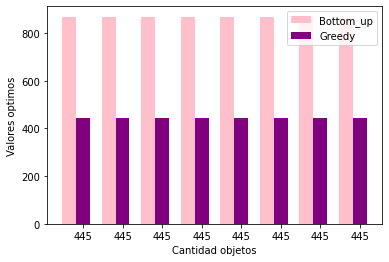

In [126]:
import numpy as np

y = []
x = []
z = []

for n in range(2, 25, 3):

    p_max = 27
    p_objetos =  [9, 4, 2, 11, 5, 9, 14]
    v_objetos = [38, 77, 157, 173, 221, 318, 354]
    cont = 0
    aux = 0
    

    valor1 = bottom_up(p_max, p_objetos, v_objetos)
    valor2 = greedy(p_max, p_objetos, v_objetos)

    y.append(valor1)
    x.append(valor2)
    z.append(n)

indices = np.arange(len(x))
anchoBarra = 0.35

plt.xlabel("Cantidad objetos")
plt.ylabel("Valores optimos")

plt.bar(indices, y, anchoBarra, color= "pink", label= "Bottom_up")
plt.bar(indices + anchoBarra, x, anchoBarra, color= "purple", label= "Greedy")

plt.xticks(indices + anchoBarra, x)
plt.legend()
plt.show()

ANÁLISIS DEL GRÁFICO

El gráfico no presenta cambios.